In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Download And Clean The Data

In [42]:
df=pd.read_csv('/content/salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
141561,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
141562,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
141563,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
141564,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB


In [44]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [45]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [46]:
df.shape[0]

141566

In [47]:
df.shape[1]

11

In [48]:
df.duplicated().sum()

73678

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

In [51]:
df.shape

(67888, 11)

In [52]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,67888.000000,6.788800e+04,67888.000000,67888.000000
mean,2024.391071,1.619580e+05,151127.991589,24.611861
std,0.728156,2.928985e+05,77396.300038,42.937729
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.640000e+04,96000.000000,0.000000
50%,2025.000000,1.397760e+05,138800.000000,0.000000
75%,2025.000000,1.920000e+05,190200.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [53]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<Axes: >

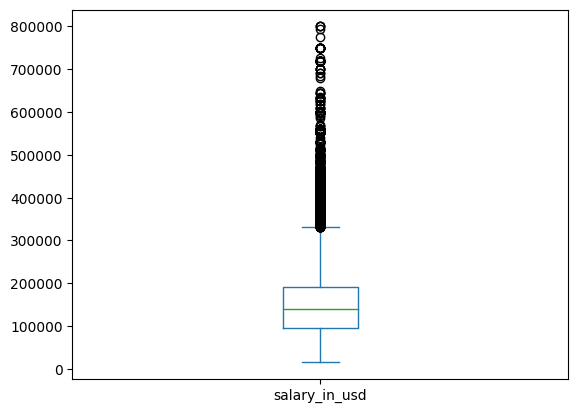

In [54]:
df.salary_in_usd.plot.box()

In [55]:
# prompt: remove all the outliers in all columns

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Iterate through all columns and remove outliers
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Process only numerical columns
        df = remove_outliers(df, col)

df.shape

(48826, 11)

In [56]:
df.salary.mean()

144190.02070618112

In [57]:
df.salary.median()

136167.5

In [58]:
df.salary.mode()

,salary
0,100000


<Axes: >

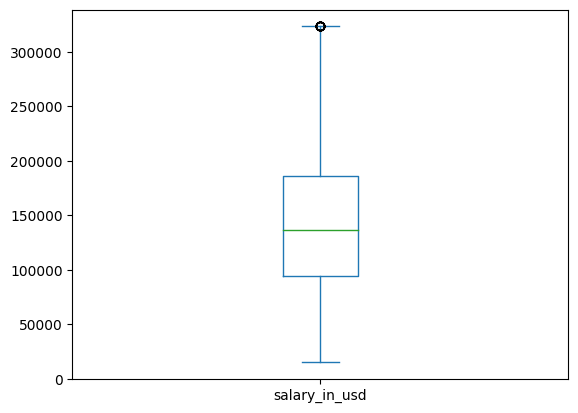

In [59]:
df.salary_in_usd.plot.box()

(array([1953., 6062., 9113., 9399., 7751., 5822., 3917., 2609., 1619.,
         581.]),
 array([ 14400.,  46560.,  78720., 110880., 143040., 175200., 207360.,
        239520., 271680., 303840., 336000.]),
 <BarContainer object of 10 artists>)

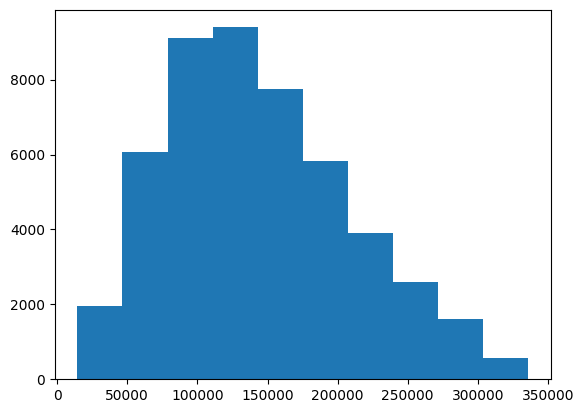

In [60]:
plt.hist(df.salary)

In [61]:
df.job_title.value_counts()

,count
job_title,
Data Scientist,4732
Data Engineer,4688
Data Analyst,4342
Software Engineer,3265
Engineer,3118
...,...
Machine Learning Performance Engineer,1
Staff Data Scientist,1
Research Data Manager,1


(array([1374., 5998., 8629., 9081., 7694., 6339., 4098., 2828., 1637.,
        1148.]),
 array([ 15157. ,  45981.3,  76805.6, 107629.9, 138454.2, 169278.5,
        200102.8, 230927.1, 261751.4, 292575.7, 323400. ]),
 <BarContainer object of 10 artists>)

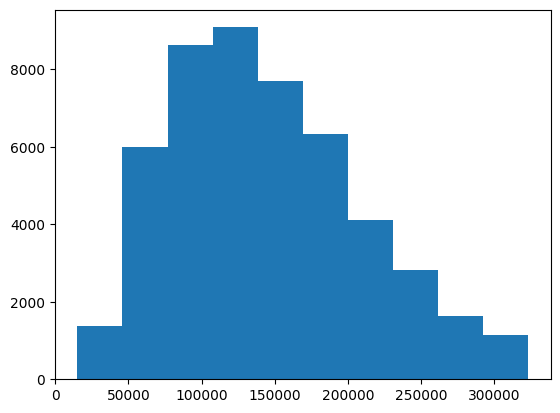

In [62]:
plt.hist(df.salary_in_usd)

Visualize the Data By group By

In [63]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [64]:
Data_Analyst = df[ df.job_title == "Data Quality Analyst"] .value_counts().sum()
Data_Analyst

116

In [65]:
df.job_title.value_counts()

,count
job_title,
Data Scientist,4732
Data Engineer,4688
Data Analyst,4342
Software Engineer,3265
Engineer,3118
...,...
Machine Learning Performance Engineer,1
Staff Data Scientist,1
Research Data Manager,1


In [66]:
df.experience_level.value_counts()

,count
experience_level,
SE,24461
MI,16425
EN,6099
EX,1841


In [67]:
df.employment_type.value_counts()

,count
employment_type,
FT,48387
PT,248
CT,190
FL,1


In [68]:
df.company_size.value_counts()

,count
company_size,
M,47886
L,907
S,33


In [69]:
df.work_year.value_counts()

,count
work_year,
2025,25314
2024,20738
2023,2774


In [70]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [71]:
groups = df.groupby("company_size") # column name
groups

In [72]:
groups.max()[["salary", "salary_in_usd" ]]

,salary,salary_in_usd
company_size,,
L,312800,312800
M,336000,323400
S,240000,240000


In [73]:
groups.mean(numeric_only=True )["salary"].astype(int)

,salary
company_size,
L,154359
M,144025
S,103454


In [74]:
groups.describe()

work_year                                                         \
                 count         mean       std     min     25%     50%     75%   
company_size                                                                    
L                907.0  2024.296582  0.658800  2023.0  2024.0  2024.0  2025.0   
M              47886.0  2024.465313  0.599848  2023.0  2024.0  2025.0  2025.0   
S                 33.0  2023.666667  0.645497  2023.0  2023.0  2024.0  2024.0   

                       salary                 ... salary_in_usd            \
                 max    count           mean  ...           75%       max   
company_size                                  ...                           
L             2025.0    907.0  154359.564498  ...      202800.0  312800.0   
M             2025.0  47886.0  144025.473541  ...      186000.0  323400.0   
S             2025.0     33.0  103454.545455  ...      142000.0  240000.0   

             remote_ratio                                     
                    count mean  std  min  25%  50%  75%  max  
company_size                                                  
L                   907.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
M                 47886.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
S                    33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 32 columns]

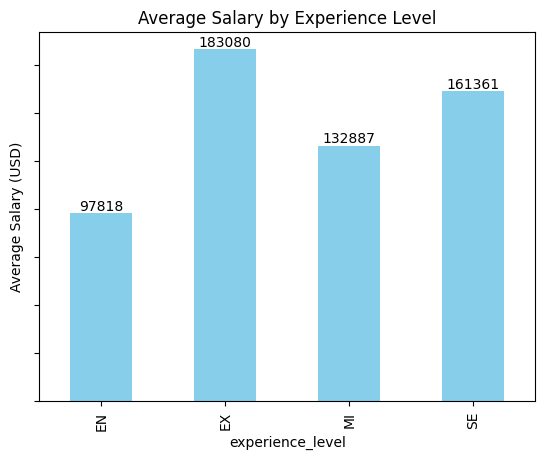

In [75]:
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()
avg =avg_salary_by_experience.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary (USD)')
for index, value in enumerate(avg_salary_by_experience):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10)
avg.set_yticklabels([])
plt.show()

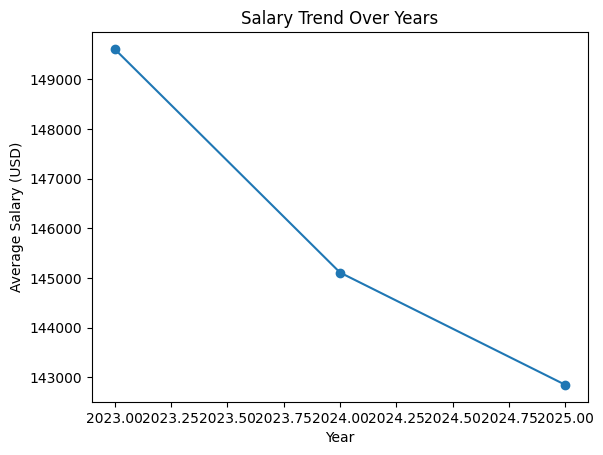

In [76]:
df.groupby('work_year')['salary'].mean().plot(kind='line', marker='o')
plt.title('Salary Trend Over Years')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Year')
plt.show()


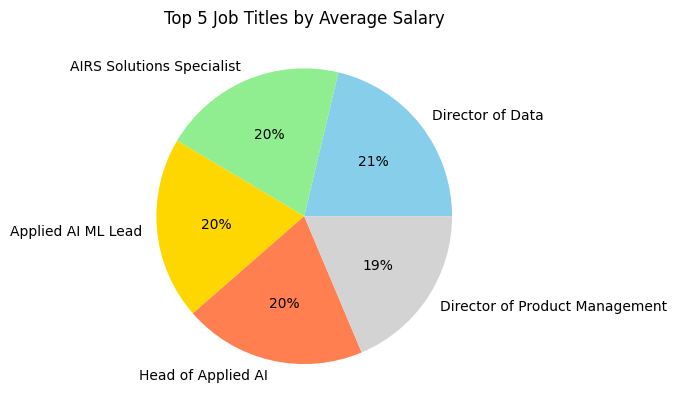

In [77]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5).plot(kind='pie',autopct='%0.0f%%',radius=1.0, colors=['skyblue','lightgreen','gold','coral','lightgrey'])
plt.title('Top 5 Job Titles by Average Salary')
plt.ylabel('') # Removed redundant y-axis label for pie chart
plt.show()

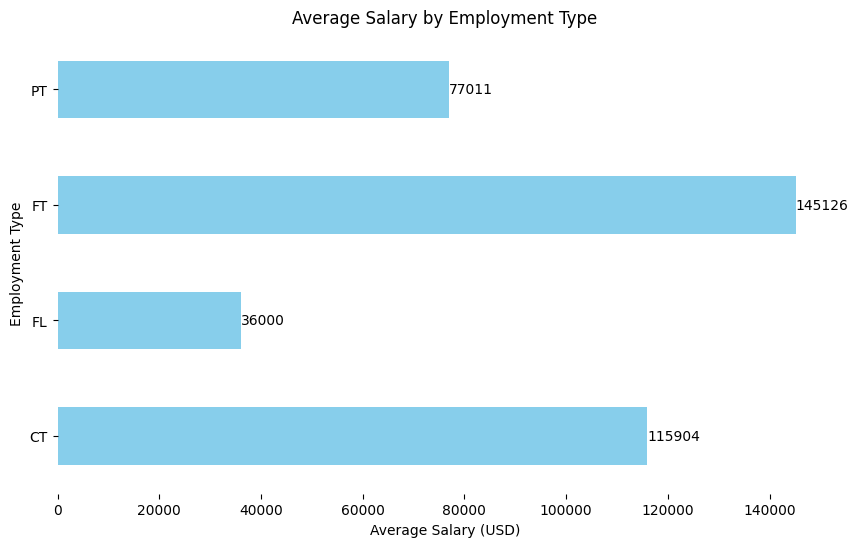

In [78]:
mean_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean()
ax = mean_salary_by_employment.plot(kind='barh', color='skyblue')
plt.title('Average Salary by Employment Type')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Employment Type')
figure = plt.gcf()
figure.set_size_inches(10, 6)
for index, value in enumerate(mean_salary_by_employment):
    ax.text(value, index, f'{value:.0f}', va='center')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [79]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


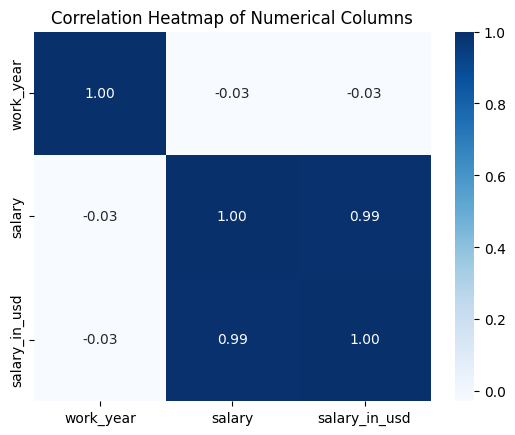

In [80]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['remote_ratio'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Machine

In [81]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [82]:
pip install category_encoders


In [83]:
import category_encoders as ce
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
encoder = ce.BinaryEncoder(cols=categorical_cols)
encoded_data = encoder.fit_transform(df[categorical_cols])
# Concatenate the encoded categorical columns with the original numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
df_encoded = pd.concat([numerical_cols, encoded_data], axis=1)
df.drop(columns=categorical_cols, inplace=True)
print(df_encoded.head())

   work_year  salary  salary_in_usd  remote_ratio  experience_level_0  \
0       2025   60000          75949             0                   0   
1       2025   48000          60759             0                   0   
2       2025  266000         266000             0                   0   
3       2025  204000         204000             0                   0   
4       2025  291000         291000             0                   0   

   experience_level_1  experience_level_2  employment_type_0  \
0                   0                   1                  0   
1                   0                   1                  0   
2                   1                   0                  0   
3                   1                   0                  0   
4                   1                   0                  0   

   employment_type_1  employment_type_2  ...  employee_residence_6  \
0                  0                  1  ...                     1   
1                  0                

In [84]:
df_encoded.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_0,experience_level_1,experience_level_2,employment_type_0,employment_type_1,employment_type_2,...,employee_residence_6,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,company_location_5,company_location_6,company_size_0,company_size_1
0,2025,60000,75949,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
1,2025,48000,60759,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,2025,266000,266000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2025,204000,204000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2025,291000,291000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [85]:
df_encoded.shape

(48826, 39)

In [86]:
df_encoded.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_0,experience_level_1,experience_level_2,employment_type_0,employment_type_1,employment_type_2,...,employee_residence_6,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,company_location_5,company_location_6,company_size_0,company_size_1
0,2025,60000,75949,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
1,2025,48000,60759,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,2025,266000,266000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2025,204000,204000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2025,291000,291000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


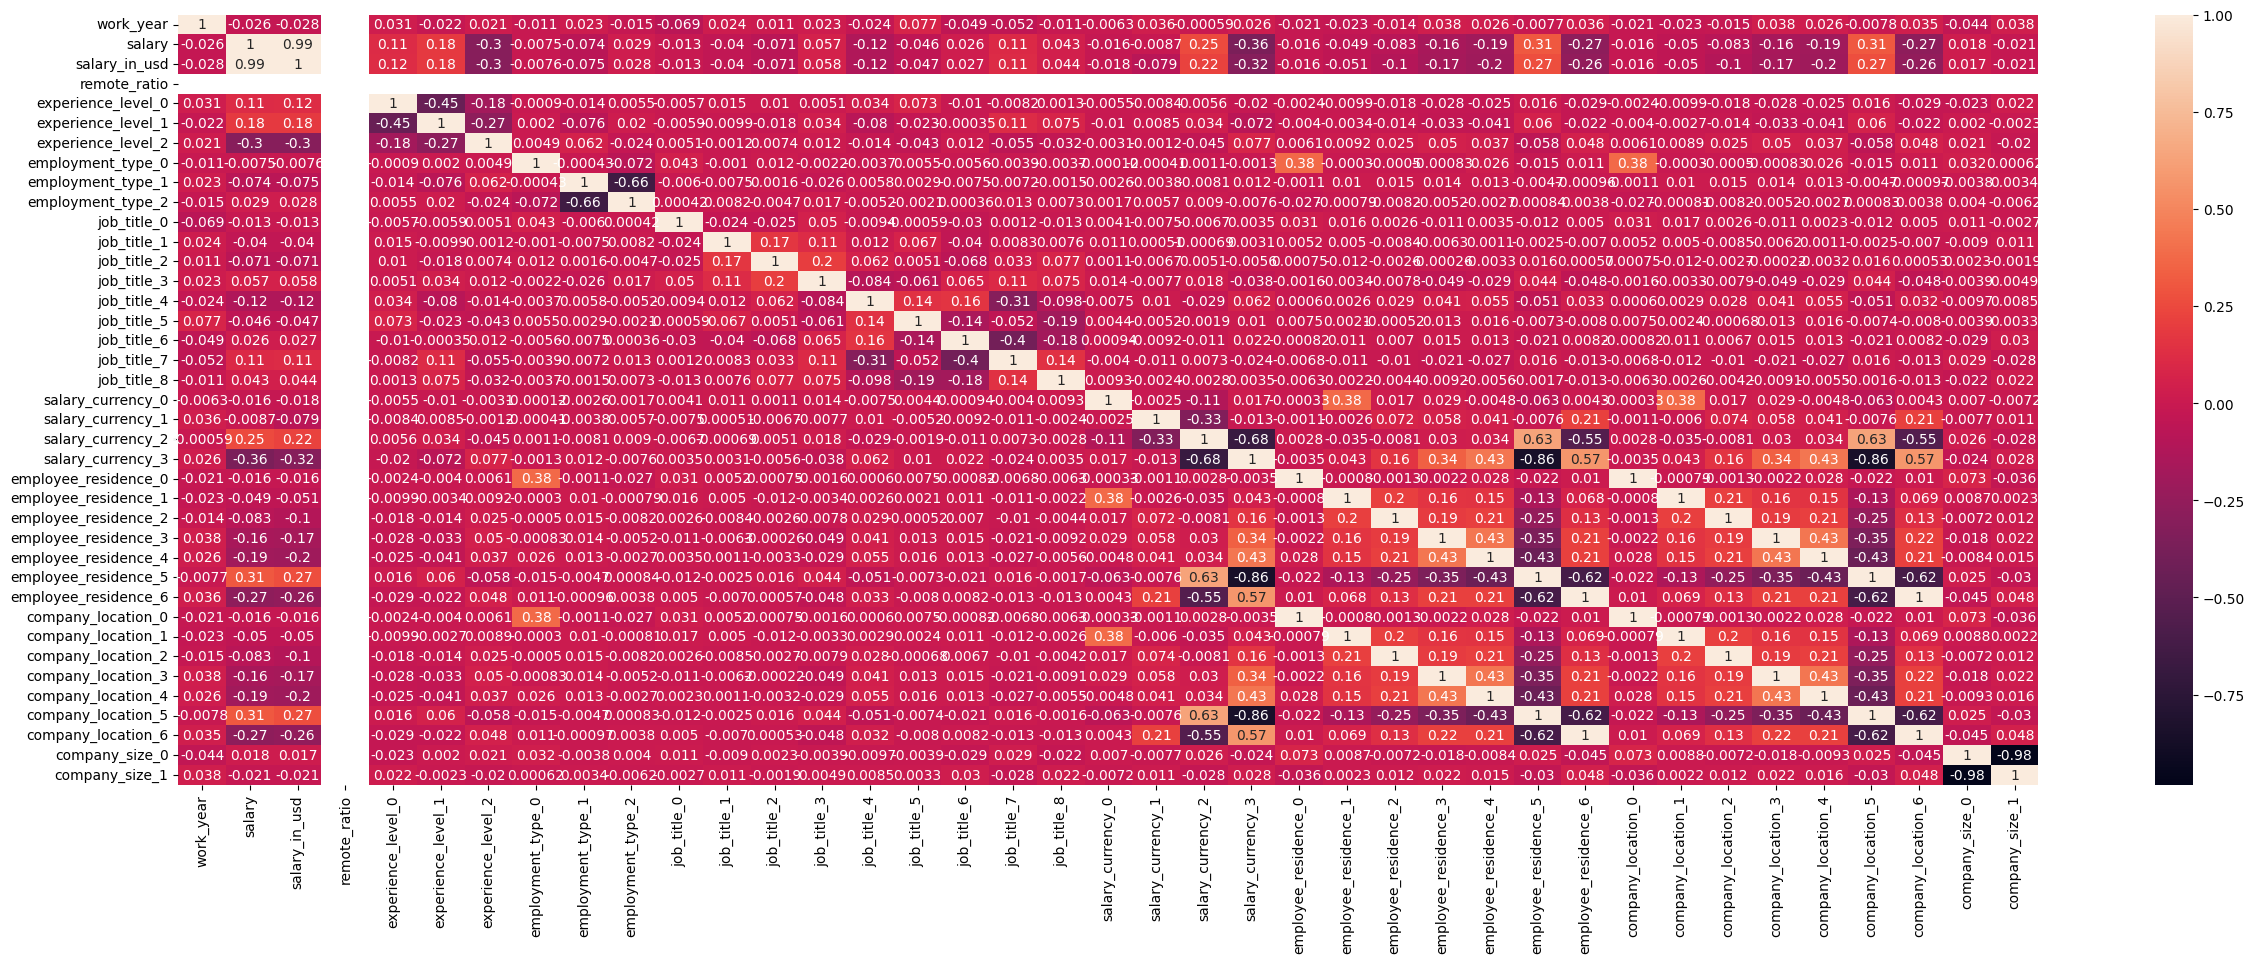

In [87]:
plt.figure(figsize=(30,10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [88]:
correlation_threshold = 0.2
highly_correlated_features = corr["salary_in_usd"][
    (corr["salary_in_usd"] >= correlation_threshold) |
    (corr["salary_in_usd"] <= -correlation_threshold)].index
print("Features with correlation magnitude >= 0.4:\n", highly_correlated_features)

Features with correlation magnitude >= 0.4:
 Index(['salary', 'salary_in_usd', 'experience_level_2', 'salary_currency_2',
       'salary_currency_3', 'employee_residence_5', 'employee_residence_6',
       'company_location_5', 'company_location_6'],
      dtype='object')


In [89]:
df_new=df_encoded[highly_correlated_features]

In [90]:
x=df_new.drop(["salary_in_usd"],axis=1)
y=df_new["salary_in_usd"]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import xgboost as xgb

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
x

,salary,experience_level_2,salary_currency_2,salary_currency_3,employee_residence_5,employee_residence_6,company_location_5,company_location_6
0,60000,1,0,1,0,1,0,1
1,48000,1,0,1,0,1,0,1
2,266000,0,1,0,1,0,1,0
3,204000,0,1,0,1,0,1,0
4,291000,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
139638,180560,0,1,0,1,0,1,0
139639,115440,0,1,0,1,0,1,0
139644,120000,0,1,0,1,1,1,1
139645,110000,0,1,0,1,1,1,1


In [94]:
y

,salary_in_usd
0,75949
1,60759
2,266000
3,204000
4,291000
...,...
139638,180560
139639,115440
139644,120000
139645,110000


In [95]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [96]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
y_pred = model.predict(X_test)

In [98]:
model.score(X_test ,y_test )

0.9960940598937333

ANN [Deep learing]

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(59, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 23816310784.0000 - mae: 139589.5000 - val_loss: 9416393728.0000 - val_mae: 77037.9688
Epoch 2/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 6332837888.0000 - mae: 61588.8047 - val_loss: 3535323392.0000 - val_mae: 48120.4492
Epoch 3/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3362677504.0000 - mae: 46938.3242 - val_loss: 2927037696.0000 - val_mae: 43791.3320
Epoch 4/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2827544064.0000 - mae: 43068.4727 - val_loss: 2419749632.0000 - val_mae: 39997.1953
Epoch 5/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2289539840.0000 - mae: 38854.5547 - val_loss: 1901394304.0000 - val_mae: 35571.2500
Epoch 6/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1781273728.0000 - mae: 34274.5430 - val_loss: 1371225984.0000 - val_mae: 30107.5215
Epoch 7/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1253983616.0000 - mae: 28647.0352 - val_loss: 823370368.0000

Automation

In [99]:
!pip install pycaret

In [105]:
!pip install --pre pycaret

from pycaret.regression import setup, compare_models, plot_model
regression_setup = setup(data = df_encoded, target = 'salary_in_usd', session_id=123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,salary_in_usd
2,Target type,Regression
3,Original data shape,"(48826, 39)"
4,Transformed data shape,"(48826, 39)"
5,Transformed train set shape,"(34178, 39)"
6,Transformed test set shape,"(14648, 39)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,676.4677,2281230.6776,1420.9416,0.9994,0.0172,0.0064,4.0070
lightgbm,Light Gradient Boosting Machine,483.4340,2787930.3534,1564.9560,0.9993,0.0207,0.0049,2.6370
et,Extra Trees Regressor,84.2214,2779984.9368,1449.8855,0.9993,0.0165,0.0012,19.1340
xgboost,Extreme Gradient Boosting,433.2804,4100151.4037,1839.2817,0.9990,0.0206,0.0043,0.5010
rf,Random Forest Regressor,129.1085,4898033.3208,1975.5444,0.9988,0.0209,0.0017,13.0830
dt,Decision Tree Regressor,107.4803,5520208.9262,2068.7576,0.9987,0.0224,0.0016,0.3400
ridge,Ridge Regression,983.9365,23168791.7018,4727.7175,0.9944,0.0628,0.0134,0.0690
br,Bayesian Ridge,986.7524,23173159.4366,4728.9080,0.9944,0.0633,0.0135,0.1290
llar,Lasso Least Angle Regression,960.6081,23206254.6747,4726.4199,0.9944,0.0630,0.0131,0.0720
lasso,Lasso Regression,976.6575,23179667.7330,4728.4719,0.9944,0.0629,0.0134,0.8220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]